<a href="https://colab.research.google.com/github/anagardeazabal/intro-nlp/blob/main/NLP_INTRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Processamento de linguagem natural

Neste projeto introdutório de estudos em NLP, primeiramente, será revisado alguns tópicos e explicação sobre algumas terminologias para maior compreensão do tema. 

Na segunda parte, será realizado nesse projeto um classificador (análise de sentimentos), com a identificação de medo e alegria. A análise é baseada no Twitter, com comentários em português.

Como é um projeto de introdução, a biblioteca do *spacy* suprirá os requisitos para o processamento de linguagem natural.

<p align="left">
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTb1Miyahs2lzSLEHo9sdCG3bgcR0lTqBtZovfwI52MOdfc0vqmoMOkRBcSpJEiNNmziTQ&usqp=CAU' width="400"/>
</p>


**NLP**

Nós, humanos, aprendemos através da percepção. Todo nosso entendimento de mundo é baseado nos sentidos e explorados pela comunicação: falamos, lemos, escrevemos. Tecnicamente, tudo isso é quantitativo através dos dados não estruturados gerados.

NLP é uma parte da inteligência artificial que lida com o entendimento e processamento da linguagem humana. De uma maneira geral, é como se existisse uma nuvem de sintaxes e relações que nós fazemos. A NLP irá mesclar linguística, ciência da computação e IA, para basicamente representar através da vetorização dessas palavras tudo que pode ser interpretado e construído a partir disso.


<p align="center">
<img src='https://blog.acolyer.org/wp-content/uploads/2016/04/word2vec-king-queen-vectors.png' width="400"/>
</p>


## E como é construído? - Ferramentas para NLP

Vamos ter como exemplo a figura acima. Foi feita uma vetorização com as palavras: rei, homem, rainha, mulher. Percebemos que existe uma correlação de similaridades dessas palavras. Se montarmos um pequeno texto, baseado no nosso imaginário, como:

"Na Escócia, existem muitos castelos. Maria, Rainha dos escoceses, teve seu reinado no castelo de Edimburgo por volta de 1573." 

Podemos processar o texto com técnicas de:

***Tokenização***: Quebrando o texto em unidades. "Na", "Escócia", "existem", "muitos"...

***POS***(Part of speech): Identificar a sintaxe dessa frase. O entedimento da máquina seria algo como: *Input*: Palavra "Escócia" -> Predição de part of speech -> *Output*: "proper_noum", nome próprio que identifica o país. (apenas para fins de exemplificação foi utilizada apenas um token, mas toda palavra é lida e identificada enquanto nome, verbo, adjetivo, etc).

***Lematização***: Reduzir a palavra em seu radical ou forma base, sem flexões. Exemplo: Escóc - ia, escoc - eses. Ou em um texto maior, poderia ter variações de reino, reinado, reinos, reinar, etc, que não fazem diferença final na análise.

***█ Stopwords***: Para considerar a importância de cada palavra no texto, devemos remover o "barulho" de palavras irrelevantes ao texto. Importante ressaltar que: nem toda palavra pequena é stopword. Se estamos analisando uma banda, por exemplo, "The rolling stones", o The é essencial para esse reconhecimento. Mas voltando ao texto inicial, "Na Escócia", "na" seria uma stopword.

***Parsing***: É um pouco mais complexo, é como se fosse a relação de dependência de palavras e como elas são interligadas estruturalmente. Por exemplo, castelo está lidado diretamente com a localização Edimburgo, é importante o reconhecimento dessa conexão para linearidade na execução.

***NER***: Reconhecimento de entidade. A palavra é detectada em uma categoria predeterminada. Ex: Escócia: país, 1573: data, Maria: pessoa.








## Classificação de sentimento - Base Twitter 𓅚

I) Início da classificação e importando as bibliotecas 

In [ ]:
!pip install -q spacy==2.2.3

     |████████████████████████████████| 10.4 MB 1.9 MB/s 
     |████████████████████████████████| 2.2 MB 39.5 MB/s 


In [ ]:
import spacy
spacy.__version__

'2.2.3'

In [ ]:
!python3 -m spacy download pt ##para trabalhar com modelos em português 

     |████████████████████████████████| 21.2 MB 7.8 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186281 sha256=1475308f4b5ff7397a63e2dd9347bcf9a2e6ed5dfc42495d0b311b2c4a2f47a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-zguv6p0z/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [ ]:
import pandas as pd
import string
import spacy
import random ##gera números aleatórios
import seaborn as sns
import numpy as np
import re ##regular expression

II) Base de dados - Treino

Disponível pelo link: *https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeutralHash.csv*

Obs: *Utilizado neste projeto o dataset com 50 mil tweets.*

**Marcação**

negative label: 0, posisitve label: 1

In [ ]:
base_treinamento = pd.read_csv('/content/Train50.csv', delimiter=';')

In [ ]:
base_treinamento.shape

(50000, 5)

In [ ]:
base_treinamento.head() 

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [ ]:
base_treinamento.tail()

,id,tweet_text,tweet_date,sentiment,query_used
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


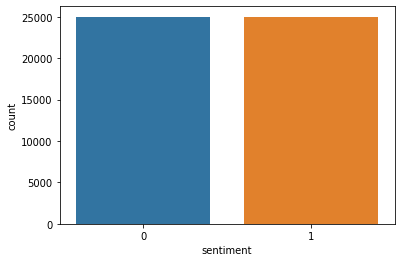

In [ ]:
sns.countplot(base_treinamento['sentiment'], label = 'Contagem'); #podemos observar que dos 50 mil tweets, 25mil sao negativos e 25 mil sao positivos

In [ ]:
base_treinamento.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True) #vamos apagar essas colunas que sao irrelevantes pra análise

In [ ]:
base_treinamento.head() #colunas já removidas

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


II) Base de dados - Teste

In [ ]:
base_teste = pd.read_csv('/content/Test.csv', delimiter=';')

In [ ]:
base_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [ ]:
base_teste.shape #base de treinamento ficou com 50 mil, para 5 mil na base de teste

(5000, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


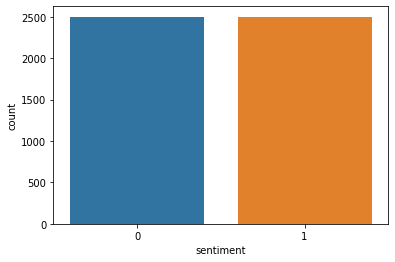

In [ ]:
sns.countplot(base_teste['sentiment'], label='Contagem'); #2500 para classe 0, 2500 para classe 1

In [ ]:
base_teste.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True) #removendo também na base de teste para ter apenas o texto e o sentimento

In [ ]:
base_teste.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


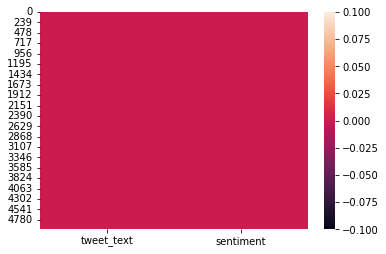

In [ ]:
sns.heatmap(pd.isnull(base_teste)); #nao temos valores nulos, portanto nao precisamos modificar mais e já podemos fazer o pré processamento

III) Função para o pré processamento dos textos

Vamos fazer a edição de:

>* Alterar para letras minúsculas
>* Remover caracteres do nome de usuário "@"
>* Remoção de URLs
>* Retirar os espaços em brancos que são gerados
>* Tratamento de emojis
>* Stop words, lematização e pontuações 


In [ ]:
pln = spacy.load ('pt')
pln

In [ ]:
base_treinamento['tweet_text'][1]

'@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

In [ ]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [ ]:
print(stop_words)

{'eventual', 'minha', 'outra', 'conhecido', 'são', 'fim', 'estes', 'ligado', 'fará', 'teus', 'dois', 'pode', 'nada', 'fostes', 'tivemos', 'vos', 'cima', 'cá', 'estou', 'isto', 'catorze', 'esteve', 'sob', 'vais', 'vez', 'apoio', 'meio', 'vários', 'qualquer', 'usa', 'teve', 'próximo', 'logo', 'porquê', 'estive', 'era', 'iniciar', 'meses', 'bastante', 'isso', 'os', 'este', 'sem', 'cinco', 'estivestes', 'nível', 'primeira', 'estivemos', 'assim', 'você', 'quinto', 'dão', 'mil', 'vós', 'somente', 'quieta', 'meu', 'momento', 'inclusive', 'com', 'sistema', 'grandes', 'pelos', 'possivelmente', 'sois', 'suas', 'diante', 'vêm', 'parte', 'coisa', 'custa', 'seria', 'sou', 'depois', 'vossos', 'nuns', 'fez', 'área', 'faço', 'parece', 'atrás', 'fomos', 'aquela', 'poder', 'agora', 'pontos', 'devem', 'valor', 'sempre', 'pouca', 'de', 'apontar', 'fazes', 'dar', 'tais', 'onde', 'muitos', 'comprido', 'é', 'entre', 'tanta', 'puderam', 'alguns', 'pelas', 'ter', 'uma', 'quais', 'após', 'longe', 'foi', 'foram'

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(texto):

  texto = texto.lower() #letras minúsculas

  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto) #nome do usuário

  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto) #urls

  texto = re.sub(r" +", ' ', texto) #espaços em branco


  lista_emocoes = {':)': 'emocaopositiva', #emojis
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
  for emocao in lista_emocoes:
    texto = texto.replace(emocao, lista_emocoes[emocao])

  documento = pln(texto) #lematização

  lista = []
  for token in documento:
    lista.append(token.lemma_)
  
  #Stop words e pontuações
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  
  return lista

In [ ]:
#frase de teste para a função, podemos observar que foi removido corretamente
texto_teste = '@behin_d_curtain :D Para :( mim, http://www.iaexpert.com.br é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'
resultado = preprocessamento(texto_teste)
resultado

'  emocaopositiva parir emocaonegativa mim precisamente o contrário emocaopositiva vir o chuva e vir o disposição emocaopositiva'

IV - Pré processamento - base de dados

Limpeza dos textos

In [ ]:
base_treinamento.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


In [ ]:
base_treinamento['tweet_text'] = base_treinamento['tweet_text'].apply(preprocessamento)

In [ ]:
base_treinamento.head(10) #podemos observar que já foi removido o caractere e os emojis

,tweet_text,sentiment
0,o pessoa certo parir seriar o valer e azeved...,1
1,parir mim precisamente o contrário emocaopos...,1
2,video hoje ... pensar falar sobrar o meter csg...,1
3,aaaaaaaa amar polaroids expressar o quantum to...,1
4,valorizar o coração menino vc diferente o sorr...,1
5,amigo to emocaopositiva,1
6,bravo jairo emocaopositiva,1
7,socorrer ksoaksosks achar to o caixa som :p,1
8,gostar fazenda emocaopositiva morrer medo ga...,1
9,amanhar venom emocaopositiva,1


In [ ]:
base_teste['tweet_text'] = base_teste['tweet_text'].apply(preprocessamento)

In [ ]:
base_teste.head(10)

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir o l...,1
3,vcs ajudar galera pelar amor butera emocaoposi...,1
4,casar zé e o morrer sono chegar o casar e fica...,1
5,preciso emocaopositiva,1
6,acaso adorar beijo e abraço hahahahaha bue f...,1
7,solteiro s emocaopositiva,1
8,lindeza cortador kit mário coleção bia cravol ...,1
9,claro emocaopositiva,1


V - Tratamento da classe

In [ ]:
#para fins didáticos: estamos percorrendo os textos e os sentimentos (positivo ou negativo), dentro da variável texto, 
#recebe o tweet e dentro da emocao, recebe o sentimento. logo após, é criado um dicionário, se o valor da emocao for =1
#recebe positivo e se for =0, recebe falso.

base_dados_treinamento_final = []
for texto, emocao in zip(base_treinamento['tweet_text'], base_treinamento['sentiment']): 
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif emocao == 0:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})

  base_dados_treinamento_final.append([texto, dic.copy()])

In [ ]:
len(base_dados_treinamento_final)

50000

In [ ]:
base_dados_treinamento_final[10:15]

[['simplesmente o deixar chatear querer muitooo e iludir emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['o comedir umar rotina e perfeitamente parir consolidar o escola condução :p',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['amigar parecer apaixonar vc — recíproco emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['  gajar bacano aleijar esperar e o silvar feliz emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['tou o video cabra bebé emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}]]

In [ ]:
base_dados_treinamento_final[45000:45005] #verificando os tweets finais para mostrar que a classificação está negativa como anteriormente

[['o menino pijama listrar o filmar triste mundo estruturar nenhum pra assistir rever e to pensar n emocaonegativa',
  {'NEGATIVO': True, 'POSITIVO': False}],
 ['pra o vídeo luísa raiz o poliana infelizmente o twitter tá ruim amanhã postar emocaonegativa asaventurasdepoliana099',
  {'NEGATIVO': True, 'POSITIVO': False}],
 ['to crise abstinência strangers emocaonegativa — tbm :/ to',
  {'NEGATIVO': True, 'POSITIVO': False}],
 ['  esquecer olhar pra pagar o mensalidade turma pro cursar querer emocaonegativa',
  {'NEGATIVO': True, 'POSITIVO': False}],
 ['querer comer doce comer montar hoje emocaonegativa maldição',
  {'NEGATIVO': True, 'POSITIVO': False}]]

VI - Criação do classificador

In [ ]:
modelo = spacy.blank('pt') #criamos o modelo vazio em portugues
categorias = modelo.create_pipe("textcat") #definimos as categorias dos textos
categorias.add_label("POSITIVO") 
categorias.add_label("NEGATIVO")
modelo.add_pipe(categorias)
historico = []

In [ ]:
modelo.begin_training() #inicio do treinamento, utilizando redes neurais para classificacao de textos
for epoca in range(20): 
  random.shuffle(base_dados_treinamento_final)
  losses = {} #dicionario para calcular o erro
  for batch in spacy.util.minibatch(base_dados_treinamento_final, 512): #treinamento de 512 em 512 para ser um pouco mais rápido
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch] #cats=categorias. percorrendo os textos e as categorias.
    modelo.update(textos, annotations, losses=losses)
    historico.append(losses)
  if epoca % 5 == 0:
    print(losses)

{'textcat': 1.4422266400249129e-05}
{'textcat': 1.0541352162343753e-07}
{'textcat': 1.4290315837085787e-07}
{'textcat': 3.9745515933347145e-10}


In [ ]:
historico_loss = [] #historico do valor do erro
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss) 
historico_loss

array([1.44222664e-05, 1.44222664e-05, 1.44222664e-05, ...,
       2.54215128e-10, 2.54215128e-10, 2.54215128e-10])

Text(0, 0.5, 'Erro')

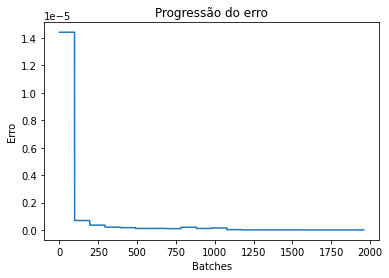

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches') #bathes = dados que foram agrupados por algum intervalo. podemos observar que foi diminuindo conforme o gráfico mostra
plt.ylabel('Erro')

In [ ]:
modelo.to_disk("modelo")

VI- Testes com uma frase

In [ ]:
modelo_carregado = spacy.load('modelo') #testes com o modelo feito
modelo_carregado

Texto positivo

In [ ]:
texto_positivo = base_teste['tweet_text'][21]
texto_positivo

'  ficar feliz q recíproco emocaopositiva'

In [ ]:
texto_positivo = base_teste['tweet_text'][32] #mais um exemplo
texto_positivo

'acertar casar emocaopositiva'

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

  ficar feliz q recíproco emocaopositiva

In [ ]:
previsao.cats #mostra as probablilidades do sentimento

{'NEGATIVO': 6.426099571399391e-05, 'POSITIVO': 0.9999545812606812}

In [ ]:
texto_positivo = 'eu gosto muito de você'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'gostar'

In [ ]:
modelo_carregado(texto_positivo).cats #positivo está maior, a leitura está correta

{'NEGATIVO': 0.11887697875499725, 'POSITIVO': 0.9093663096427917}

Texto negativo

In [ ]:
base_teste['tweet_text'][4000]

'tô triste filmar mulan o mushu emocaonegativa'

In [ ]:
texto_negativo = base_teste['tweet_text'][4000] 
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'NEGATIVO': 0.999934196472168, 'POSITIVO': 4.539786823443137e-05}

Avaliação na base de treinamento

In [ ]:
previsoes = []
for texto in base_treinamento['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes

[{'NEGATIVO': 6.953728734515607e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 6.47815759293735e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 7.14345442247577e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 0.00016260129632428288, 'POSITIVO': 0.9999468326568604},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 0.00021691415167879313, 'POSITIVO': 0.9999481439590454},
 {'NEGATIVO': 5.375498585635796e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 0.00011134049418615177, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 0.0001438066246919334, 'POSITIVO': 0.9996434450149536},
 {'NEGATIVO': 0.00010077566548716277, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.53

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
respostas_reais = base_treinamento['sentiment'].values
respostas_reais

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[25000,     0],
       [    0, 25000]])

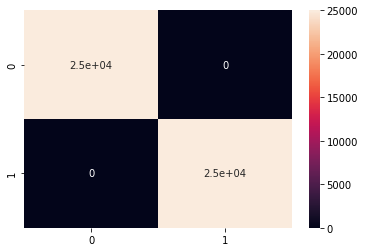

In [ ]:
sns.heatmap(cm, annot=True)

Avaliação na base Teste

In [ ]:
previsoes = []
for texto in base_teste['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = base_teste['sentiment'].values

In [ ]:
accuracy_score(respostas_reais, previsoes_final)

0.9972

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2494,    6],
       [   8, 2492]])

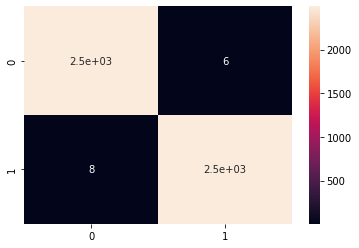

In [ ]:
sns.heatmap(cm, annot=True)

Conclusão 

Apenas com o spacy foi feito um classificador de sentimento, com o resultado de pequena discrepância no resultado (vale ressaltar que o dataframe já estava limpo e é mais fácil de fazer o modelo, até porque não teve dados para tratar). Mas é interessante utilizar outros recursos para explorar, como representação de bag of words e bibliotecas, como Nltk.